<a href="https://colab.research.google.com/github/ArPaWi/ML_PadiCare/blob/arya/dev_padicare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NOTEBOOK PADI CARE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import random
import numpy as np
import io
from io import BytesIO
from IPython.display import display

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

# MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
BASE_DIR = r'drive/MyDrive/data'

train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

# Directory with training pictures
train_brownspot_dir = os.path.join(train_dir, 'brownspot')
train_healthy_dir = os.path.join(train_dir, 'healthy')
train_hispa_dir = os.path.join(train_dir, 'hispa')
train_leafblast_dir = os.path.join(train_dir, 'leafblast')

# Directory with validation pictures
validation_brownspot_dir = os.path.join(validation_dir, 'brownspot')
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
validation_hispa_dir = os.path.join(validation_dir, 'hispa')
validation_leafblast_dir = os.path.join(validation_dir, 'leafblast')

# Function to print directory contents
def print_directory_contents(directory, description):
    if os.path.exists(directory):
        print(f"\nContents of {description}: {os.listdir(directory)}")
    else:
        print(f"\nDirectory {description} does not exist: {directory}")

# Check base directory
print_directory_contents(BASE_DIR, "base directory")

# Check train and validation directories
print_directory_contents(train_dir, "train directory")
print_directory_contents(validation_dir, "validation directory")

# Check each class directory
print_directory_contents(train_brownspot_dir, "train/brownspot directory")
print_directory_contents(train_healthy_dir, "train/healthy directory")
print_directory_contents(train_hispa_dir, "train/hispa directory")
print_directory_contents(train_leafblast_dir, "train/leafblast directory")

print_directory_contents(validation_brownspot_dir, "validation/brownspot directory")
print_directory_contents(validation_healthy_dir, "validation/healthy directory")
print_directory_contents(validation_hispa_dir, "validation/hispa directory")
print_directory_contents(validation_leafblast_dir, "validation/leafblast directory")


Contents of base directory: ['train', 'validation']

Contents of train directory: ['leafblast', 'healthy', 'brownspot', 'hispa']

Contents of validation directory: ['hispa', 'brownspot', 'leafblast', 'healthy']

Contents of train/brownspot directory: ['train_brownspot323.jpg', 'train_brownspot269.jpg', 'train_brownspot127.jpg', 'train_brownspot12.jpg', 'train_brownspot252.jpg', 'train_brownspot207.jpg', 'train_brownspot18.jpg', 'train_brownspot316.jpg', 'train_brownspot184.jpg', 'train_brownspot188.jpg', 'train_brownspot140.jpg', 'train_brownspot221.jpg', 'train_brownspot236.jpg', 'train_brownspot113.jpg', 'train_brownspot275.jpg', 'train_brownspot126.jpg', 'train_brownspot267.jpg', 'train_brownspot158.jpg', 'train_brownspot24.jpg', 'train_brownspot309.jpg', 'train_brownspot186.jpg', 'train_brownspot228.jpg', 'train_brownspot19.jpg', 'train_brownspot105.jpg', 'train_brownspot151.jpg', 'train_brownspot208.jpg', 'train_brownspot117.jpg', 'train_brownspot16.jpg', 'train_brownspot194.jpg'

In [3]:
print(f'total training brownspot images: {len(os.listdir(train_brownspot_dir))}')
print(f'total training healthy images: {len(os.listdir(train_healthy_dir))}')
print(f'total training hispa images: {len(os.listdir(train_hispa_dir))}')
print(f'total training leafblast images: {len(os.listdir(train_leafblast_dir))}')

print(f'total validation brownspot images: {len(os.listdir(validation_brownspot_dir))}')
print(f'total validation healthy images: {len(os.listdir(validation_healthy_dir))}')
print(f'total validation hispa images: {len(os.listdir(validation_hispa_dir))}')
print(f'total validation leafblast images: {len(os.listdir(validation_leafblast_dir))}')

total training brownspot images: 450
total training healthy images: 450
total training hispa images: 450
total training leafblast images: 450
total validation brownspot images: 113
total validation healthy images: 113
total validation hispa images: 113
total validation leafblast images: 113


In [50]:
# Membuat generator dengan augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    fill_mode='reflect'
)

# Dataset training dengan augmentasi
train_dataset_augmented = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Dataset validasi (tanpa augmentasi)
val_datagen = ImageDataGenerator(rescale=1./255)
validation_dataset = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 1800 images belonging to 4 classes.
Found 452 images belonging to 4 classes.


In [51]:
print('Total No Of Classes in the dataset:',len(train_dataset_augmented.class_indices))
print('Class Names:',train_dataset_augmented.class_indices)

Total No Of Classes in the dataset: 4
Class Names: {'brownspot': 0, 'healthy': 1, 'hispa': 2, 'leafblast': 3}


In [52]:
print('Total No Of Classes in the dataset:',len(validation_dataset.class_indices))
print('Class Names:',validation_dataset.class_indices)

Total No Of Classes in the dataset: 4
Class Names: {'brownspot': 0, 'healthy': 1, 'hispa': 2, 'leafblast': 3}


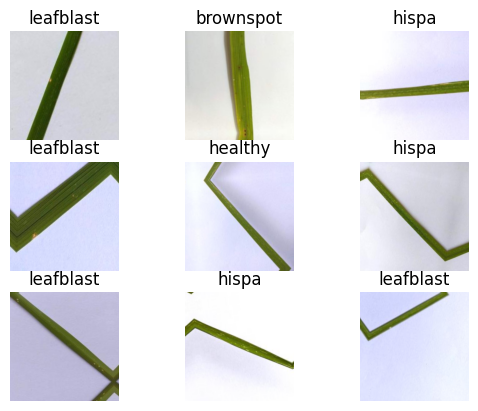

In [53]:
for i in range(9):
    img, label = train_dataset_augmented.__getitem__(i)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    plt.title(list(train_dataset_augmented.class_indices.keys())[np.argmax(label)])
    plt.axis("off")
plt.show()

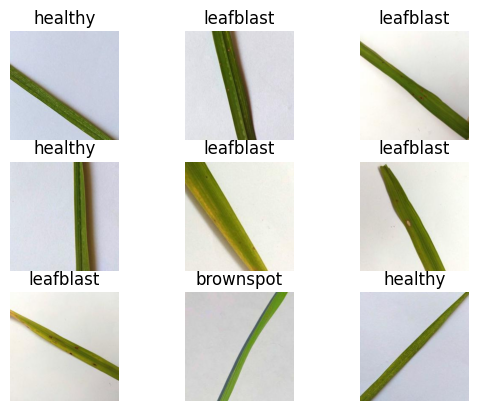

In [54]:
for i in range(9):
    img, label = validation_dataset.__getitem__(i)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    plt.title(list(validation_dataset.class_indices.keys())[np.argmax(label)])
    plt.axis("off")
plt.show()

In [55]:
base_model = MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:50]:
    layer.trainable = False

<ipython-input-55-50fbd3ed2df7>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [56]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,908 (11.12 MB)

 Trainable params: 2,832,516 (10.81 MB)

 Non-trainable params: 83,392 (325.75 KB)

In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [60]:
history = model.fit(
    train_dataset_augmented,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.4577 - loss: 1.9301 - val_accuracy: 0.2699 - val_loss: 2.6106 - learning_rate: 1.0000e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 321s 5s/step - accuracy: 0.6209 - loss: 1.6084 - val_accuracy: 0.2743 - val_loss: 2.8632 - learning_rate: 1.0000e-04
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.7044 - loss: 1.4253 - val_accuracy: 0.3341 - val_loss: 2.6111 - learning_rate: 1.0000e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.7100 - loss: 1.3893 - val_accuracy: 0.3341 - val_loss: 2.3872 - learning_rate: 1.0000e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 317s 5s/step - accuracy: 0.7751 - loss: 1.2575 - val_accuracy: 0.3650 - val_loss: 2.1540 - learning_rate: 1.0000e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.8108 - loss: 1.1933 - val_accuracy: 0.3518 - val_loss: 2.4328 - learning_rate: 1.0000e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.8212 - loss: 1.1

In [61]:
# Mapping kelas
class_names = {0: 'brownspot', 1: 'healthy', 2: 'hispa', 3: 'leafblast'}

# Widget untuk mengunggah file
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)

# Output area
out = widgets.Output()
display(out)

def file_predict(filename, file_content, out):
    """Fungsi untuk membuat prediksi dan mencetak hasilnya."""
    # Muat dan proses gambar
    image = tf.keras.utils.load_img(io.BytesIO(file_content), target_size=(256, 256))  # Gunakan io.BytesIO
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Normalisasi jika model memerlukannya
    image = image / 255.0

    # Buat prediksi
    prediction = model.predict(image, verbose=0)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_names[predicted_class]

    # Ambil tingkat kecocokan setiap kelas
    confidence_levels = {class_names[i]: round(prediction[0][i] * 100, 2) for i in range(len(class_names))}

    # Cetak hasil
    with out:
        print(f"{filename} diklasifikasikan sebagai: {predicted_label}")
        print("Tingkat kecocokan per kelas:")
        for cls, confidence in confidence_levels.items():
            print(f"  {cls}: {confidence}%")

def on_upload_change(change):
    """Fungsi untuk memproses file yang diunggah dan menjalankan prediksi."""
    for filename, file_info in change['new'].items():  # Mengakses informasi file dengan format baru
        content = file_info['content']
        file_predict(filename, content, out)

# Observasi perubahan pada uploader
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

In [49]:
# Buat folder
os.makedirs("saved_model", exist_ok=True)

# Simpan Model dalam Format SavedModel
model.export("saved_model/my_model")

# Lokasi Model yang Disimpan
saved_model_dir = "saved_model/my_model"

# Menggunakan TFLite Converter
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Menyimpan model dalam format TFLite
output_tflite_file = "/content/saved_model/model.tflite"
with open(output_tflite_file, "wb") as f:
    f.write(tflite_model)

print(f"Model berhasil dikonversi ke TFLite dan disimpan di {output_tflite_file}")

Saved artifact at 'saved_model/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_474')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132640559002400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640556655616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640556656144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640556658784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640556660544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640556658960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640557064864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640557067504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640557063456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640557065392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132640